<a href="https://colab.research.google.com/github/laurenx1/heartFail/blob/main/heart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
X = df[['age','creatinine_phosphokinase','ejection_fraction', 'high_blood_pressure','serum_creatinine','serum_sodium', 'smoking']].values #no high blood pressure, which was 6, no smoking, which was 11
y = df[['DEATH_EVENT']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(224, 7) (75, 7) (224, 1) (75, 1)


In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

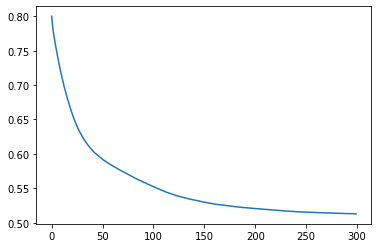

In [ ]:
model = 0
model = Sequential() 
model.add(Dense(3, activation='relu', use_bias=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=300,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

In [ ]:
y_train_hat_cat = model.predict_classes(X_train_scaled)
print(classification_report(y_train,y_train_hat_cat))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.73      0.56      0.64        78

    accuracy                           0.78       224
   macro avg       0.76      0.73      0.74       224
weighted avg       0.77      0.78      0.77       224



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_val_hat_cat = model.predict_classes(X_test_scaled)
print(classification_report(y_test,y_val_hat_cat))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        57
           1       0.69      0.61      0.65        18

    accuracy                           0.84        75
   macro avg       0.78      0.76      0.77        75
weighted avg       0.83      0.84      0.84        75



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
